# Demo magnify

Illustrate the interpolation of magnified images

## Description

In this demonstration, the interpolation of magnified image is explained using the frequency domain. The interpolation is a low pass filter that can be applied either in the spatial domain, which is the methods known as nearest neighbor or pixel replication and bi-linear interpolation. Or in the frequency domain, with an ideal filter or a butterworth filter.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Reading and ROI selection

The image is read and a 64x64 ROI is selected and displayed

""
"(64, 64)"

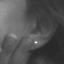

(64, 64)


In [3]:
fin = mpimg.imread('../data/lenina.pgm')
nb = ia.nbshow(3)
#nb.nbshow(fin,'%s'% (fin.shape,))
froi = fin[137:137+64,157:157+64]
nb.nbshow(froi,'%s'% (froi.shape,))
nb.nbshow()
print(froi.shape)

## DFT


The DFT of the small image is taken and its spectrum displayed

""
""
""
""

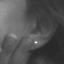
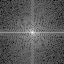

In [4]:
import numpy as np

fd = froi.astype(float)
F = np.fft.fft2(fd)
nb = ia.nbshow(2)
nb.nbshow(froi)
nb.nbshow(ia.dftview(F))
nb.nbshow()

## Expansion by 4 without interpolation

The image is expanded by 4, but filling the new pixels with 0

""
""
""
""

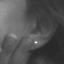
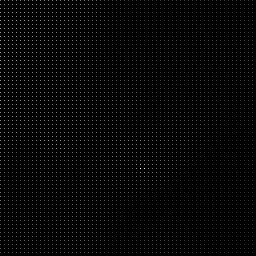

In [5]:
fx4 = np.zeros(4*np.array(froi.shape), 'uint8')
fx4[::4,::4] = froi
nb.nbshow(froi)
nb.nbshow(fx4)
nb.nbshow()

## DFT of the expansion without interpolation


Using the expansion propertie of the DFT (only valid for the discrete case), the resulting DFT is a periodical replication of the original DFT.

""
""
""
""

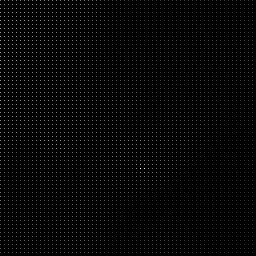
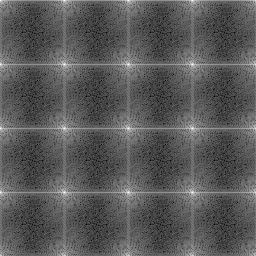

In [6]:
fdx4 = fx4.astype(np.float)
Fx4 = np.fft.fft2(fdx4)

nb.nbshow(fx4)
nb.nbshow(ia.dftview(Fx4))
nb.nbshow()

## Filtering by mean filtering - nearest neighbor


Filtering the expanded image using an average filter of size 4x4 is equivalent of applying a nearest neighbor interpolator. The zero pixels are replaced by the nearest non-zero pixel. This is equivalent to interpolation by pixel replication.

""
""
""
""

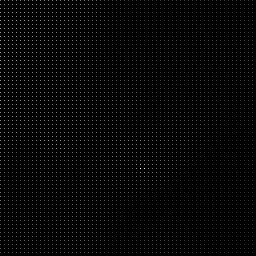
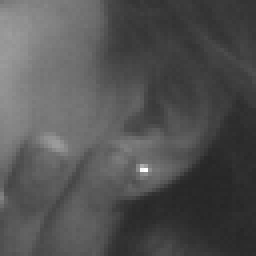

[[ 117.  117.  117.  117.  124.  124.  124.  124.  124.]
 [ 117.  117.  117.  117.  124.  124.  124.  124.  124.]
 [ 117.  117.  117.  117.  124.  124.  124.  124.  124.]
 [ 117.  117.  117.  117.  124.  124.  124.  124.  124.]
 [ 129.  129.  129.  129.  129.  129.  129.  129.  129.]
 [ 129.  129.  129.  129.  129.  129.  129.  129.  129.]
 [ 129.  129.  129.  129.  129.  129.  129.  129.  129.]
 [ 129.  129.  129.  129.  129.  129.  129.  129.  129.]
 [ 138.  138.  138.  138.  139.  139.  139.  139.  136.]]


In [7]:
k = np.ones((4,4))
fx4nn = ia.pconv(fdx4, k)
nb.nbshow(fx4)
nb.nbshow(fx4nn.astype(np.uint8))
nb.nbshow()
print(fx4nn[:9,:9])

## Interpretation of the mean filtering in the frequency domain

Filtering by the average filter in space domain is equivalent to filter in the frequency domain by the sync filter.

""
""
""
""

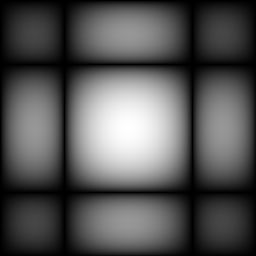
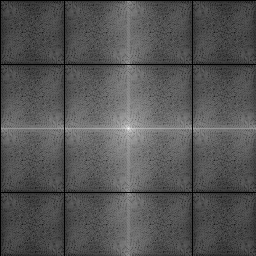

In [8]:
kzero = np.zeros(fx4.shape)
kzero[0:4,0:4] = k
K = np.fft.fft2(kzero)
nb.nbshow(ia.dftview(K))
Fx4nn = K * Fx4
nb.nbshow(ia.dftview(Fx4nn))
nb.nbshow()

""
""
""
""

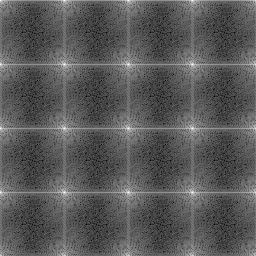
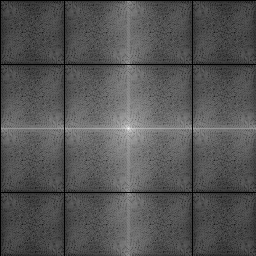

In [9]:
nb.nbshow(ia.dftview(Fx4))
nb.nbshow(ia.dftview(Fx4nn))
nb.nbshow()

## Filtering by pyramidal kernel, linear interpolation


Filtering by a pyramidal kernel in space domain is equivalent to make a bi-linear interpolation. The zero pixels are replaced by a weighted sum of the neighbor pixels, the weight is inversely proportional to the non-zero pixel distance.


k2dlinear=
 [[ 0.0625  0.125   0.1875  0.25    0.1875  0.125   0.0625]
 [ 0.125   0.25    0.375   0.5     0.375   0.25    0.125 ]
 [ 0.1875  0.375   0.5625  0.75    0.5625  0.375   0.1875]
 [ 0.25    0.5     0.75    1.      0.75    0.5     0.25  ]
 [ 0.1875  0.375   0.5625  0.75    0.5625  0.375   0.1875]
 [ 0.125   0.25    0.375   0.5     0.375   0.25    0.125 ]
 [ 0.0625  0.125   0.1875  0.25    0.1875  0.125   0.0625]]


""
""
""
""

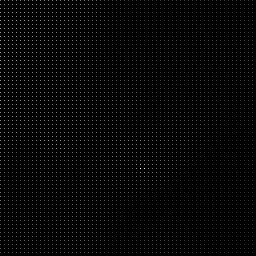
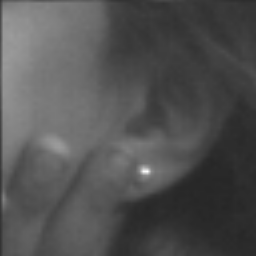

In [10]:
klinear = np.array([[1,2,3,4,3,2,1]])/4.
k2dlinear = klinear.T.dot(klinear)
print('k2dlinear=\n',k2dlinear)
fx4li = ia.pconv(fdx4, k2dlinear)
nb.nbshow(fx4)
nb.nbshow(fx4li.astype(np.uint8))
nb.nbshow()

## Interpretation of the pyramid filtering in the frequency domain


Filtering by the pyramid filter in space domain is equivalent to filter in the frequency domain by the square of the sync filter.

""
""
""
""

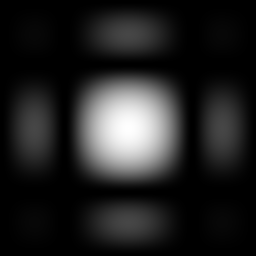
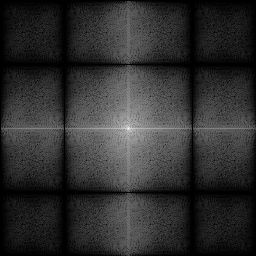

In [11]:
klizero = np.zeros(fx4.shape)
klizero[0:7,0:7] = k2dlinear
Klinear = np.fft.fft2(klizero)
nb.nbshow(ia.dftview(Klinear))
Fx4li = Klinear * Fx4
nb.nbshow(ia.dftview(Fx4li))
nb.nbshow()

""
""
""
""

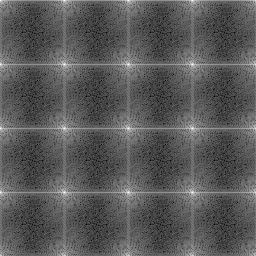
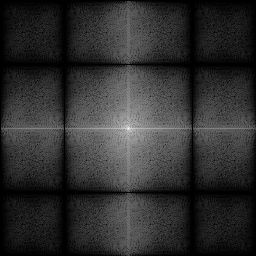

In [12]:
nb.nbshow(ia.dftview(Fx4))
nb.nbshow(ia.dftview(Fx4li))
nb.nbshow()

## Using an ideal filter

Filtering by cutoff period of 8

""
""
""
""

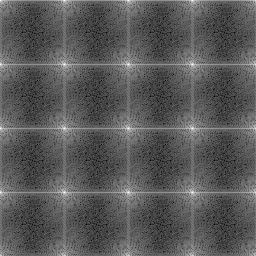
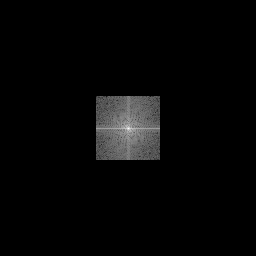

In [15]:
FI = np.zeros_like(Fx4)
FI[:FI.shape[0]//8,:FI.shape[1]//8] = 1
FI[-FI.shape[0]//8:,:FI.shape[1]//8] = 1
FI[:FI.shape[0]//8,-FI.shape[1]//8:] = 1
FI[-FI.shape[0]//8:,-FI.shape[1]//8:] = 1
Fx4ideal = Fx4 * FI
nb.nbshow(ia.dftview(Fx4))
nb.nbshow(ia.dftview(Fx4ideal))
nb.nbshow()

1.06581410364e-14
29.8571211843 276.800678395
38 255


""
""

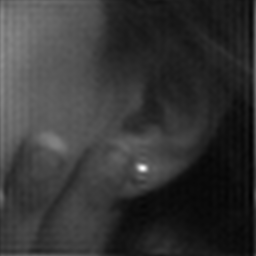

In [27]:
nb = ia.nbshow(2)
fx4ideal_c = np.fft.ifft2(Fx4ideal)
print(fx4ideal_c.imag.sum())
fx4ideal= 16*fx4ideal_c.real
print(fx4ideal.min(),fx4ideal.max())
print(froi.min(),froi.max())
nb.nbshow(ia.normalize(fx4ideal))
nb.nbshow()

""
""
""
""

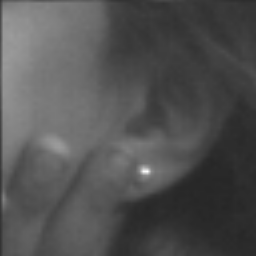
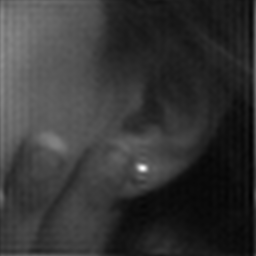

In [29]:
nb = ia.nbshow(3)
#nb.nbshow(froi)
nb.nbshow(fx4li.astype(np.uint8))
nb.nbshow(ia.normalize(fx4ideal))
nb.nbshow()

    H8 = iabwlp(fx4.shape, 8, 10000)
    adshow(iadftview(H8))
    G8 = Fx4 * H8
    adshow(iadftview(G8))
    g_ideal = np.fft.ifft2(G8)
    print 'Max of imaginary:', g_ideal.imag.max()
    g_ideal = ianormalize(g_ideal.real, [0,255])
    adshow(g_ideal)

Using a Butterworth filter of order 5
-------------------------------------

Filtering by cutoff period of 8

.. code:: python

    HB8 = iabwlp(fx4.shape, 8, 5)
    adshow(iadftview(HB8))
    GB = Fx4 * HB8
    adshow(iadftview(GB))
    g_b = np.fft.ifft2(GB)
    print 'Max of imaginary:', g_b.imag.max()
    g_b = ianormalize(g_b.real, [0,255])
    adshow(g_b)


Display all four for comparison
-------------------------------

Top-left: nearest neighbor, Top-right: linear, Bottom-left: ideal, Bottom-right: Butterworth

.. code:: python

    aux1 = np.concatenate((fx4nn[0:256,0:256], fx4li[0:256,0:256]), 1)
    aux2 = np.concatenate((g_ideal, g_b), 1)
    adshow(np.concatenate((aux1, aux2)))